In [1]:
import requests
import pandas as pd

In [2]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                  'AppleWebKit/537.36 (KHTML, like Gecko) '
                  'Chrome/114.0.0.0 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Connection': 'keep-alive',
    # Add more headers if needed (like cookies, referer, etc.)
}

In [21]:
url="https://www.worldometers.info/world-population/population-by-country/"

response = requests.get(url, headers=headers)
tables = pd.read_html(response.text)
df = tables[0]
df = df.drop('#', axis=1)
df.head()
df.to_csv("world_population_7142025.csv",index=False)



/tmp/ipython-input-21-108167456.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


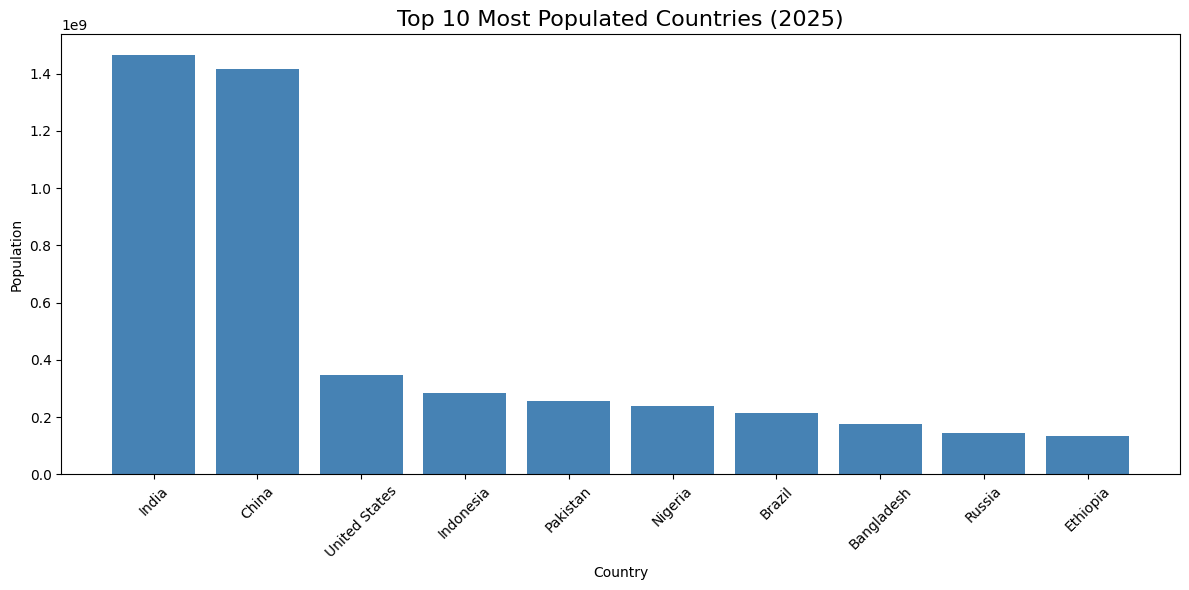

In [22]:
import matplotlib.pyplot as plt
# Step 3: Convert population column if needed
# If already numeric, skip conversion. If not, remove commas and convert to int
if df['Population (2025)'].dtype == object:
    df['Population (2025)'] = df['Population (2025)'].str.replace(',', '').astype(int)

# Step 4: Select top 10 by population
df_top10 = df.head(10)

# Step 5: Plot
plt.figure(figsize=(12, 6))
plt.bar(df_top10['Country (or dependency)'], df_top10['Population (2025)'], color='steelblue')
plt.title('Top 10 Most Populated Countries (2025)', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
from google.colab import files
files.download('world_population_7142025.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>